In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import folium
import pandas as pd
from folium import plugins
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
station = pd.read_csv('station_geom.csv')
airbnb= pd.read_csv('Airbnb_with_station_crime.csv')
all_crime = pd.read_csv('crime-20000.csv')

In [3]:
plt.figure(figsize = (20,15))
airbnb_filter = airbnb[airbnb['price'] <= 500]
airbnb.plot(kind = 'scatter',x = 'longitude',y = 'latitude', c = 'price',
                   cmap = plt.get_cmap('terrain'),alpha = 0.4,figsize = (10,6))

<Figure size 1440x1080 with 0 Axes>

In [4]:
for i in ['availability_365','number_of_crime','number_of_station']:
    airbnb_filter[i] = 10*(airbnb_filter[i] - airbnb_filter[i].min())/(airbnb_filter[i].max()-airbnb_filter[i].min())
    airbnb_filter[i] = airbnb_filter[i].round(1)
airbnb_filter['number_of_crime'] = 10 - airbnb_filter['number_of_crime']
airbnb_filter['rating'] = airbnb_filter['availability_365'] + airbnb_filter['number_of_crime'] + airbnb_filter['number_of_station']
airbnb_filter.sort_values(by='rating',ascending = False,inplace = True)
airbnb_filter.head()


Unnamed: 0        id  \
1360         1360   1143582   
25317       25317  45138933   
24579       24579  44393462   
25316       25316  45138904   
18088       18088  38236832   

                                                    name  latitude  longitude  \
1360                            Convenient Downtown Room  40.71051  -74.00775   
25317       Stylish 1BR Apt | Gym | City Hall Park | NYC  40.71047  -74.00693   
24579                             Financial District Gem  40.71047  -74.00676   
25316  Spacious 1BR | Full Kitchen | Gym | City Hall ...  40.71211  -74.00726   
18088  The Residences at W New York - Downtown - Apt 27E  40.70996  -74.01276   

             room_type  price  availability_365 neighbourhood_group  \
1360       Shared room     75               9.8           Manhattan   
25317  Entire home/apt    129              10.0           Manhattan   
24579     Private room    120              10.0           Manhattan   
25316  Entire home/apt    129              10.0           Manhattan   
18088  Entire home/apt    142               9.9           Manhattan   

       number_of_crime  number_of_station  rating  
1360               7.1                9.3    26.2  
25317              6.9                8.7    25.6  
24579              6.8                8.7    25.5  
25316              6.7                8.7    25.4  
18088              7.3                8.0    25.2

<Figure size 1440x1080 with 0 Axes>

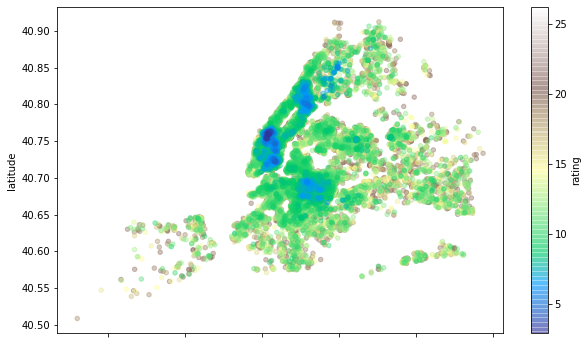

In [5]:
plt.figure(figsize = (20,15))
airbnb_filter.plot(kind = 'scatter',x = 'longitude',y = 'latitude', c = 'rating',
                   cmap = plt.get_cmap('terrain'),alpha = 0.4,figsize = (10,6))

In [6]:
plt.figure(figsize = (10,6))
sns.boxplot(data = airbnb_filter, x = 'room_type',y = 'rating')

In [7]:
airbnb_filter.head()

Unnamed: 0        id  \
1360         1360   1143582   
25317       25317  45138933   
24579       24579  44393462   
25316       25316  45138904   
18088       18088  38236832   

                                                    name  latitude  longitude  \
1360                            Convenient Downtown Room  40.71051  -74.00775   
25317       Stylish 1BR Apt | Gym | City Hall Park | NYC  40.71047  -74.00693   
24579                             Financial District Gem  40.71047  -74.00676   
25316  Spacious 1BR | Full Kitchen | Gym | City Hall ...  40.71211  -74.00726   
18088  The Residences at W New York - Downtown - Apt 27E  40.70996  -74.01276   

             room_type  price  availability_365 neighbourhood_group  \
1360       Shared room     75               9.8           Manhattan   
25317  Entire home/apt    129              10.0           Manhattan   
24579     Private room    120              10.0           Manhattan   
25316  Entire home/apt    129              10.0           Manhattan   
18088  Entire home/apt    142               9.9           Manhattan   

       number_of_crime  number_of_station  rating  
1360               7.1                9.3    26.2  
25317              6.9                8.7    25.6  
24579              6.8                8.7    25.5  
25316              6.7                8.7    25.4  
18088              7.3                8.0    25.2

In [11]:
airbnbname = input('Please enter the name of airbnb')
temp = airbnb_filter[airbnb_filter.name ==airbnbname]

tiles = 'Stamen Terrain'
NY_map = folium.Map(location = [temp.latitude,temp.longitude],zoom_start = 20,tiles = tiles)

# add all subway station
for lat,lng,stop in zip(station.latitude,station.longitude,station.NAME):
        folium.Marker([lat,lng],popup = stop,icon=folium.Icon(icon='cloud')).add_to(NY_map)
#add specific airbnb
for lat,lng,name1,name2,name3 in zip(temp.latitude,temp.longitude,temp.name,temp.number_of_crime,temp.number_of_station):
        folium.Marker(
            [lat,lng],popup = ['ID:'+str(name1),'Crime(0.5 miles):'+str(name2),'Station(0.2 miles):'+str(name3)]
        ,icon = folium.Icon(color = 'red',icon = 'info-sign')).add_to(NY_map)
#add red circle on map
for lat,lng in zip(temp.latitude,temp.longitude):
        folium.Circle(
            [lat,lng],radius = 300,color = 'red'
        ).add_to(NY_map)



#add Crime cluster on NY_map
crime_location = list(zip(all_crime.Latitude,all_crime.Longitude))
cluster = plugins.MarkerCluster(locations = crime_location)
NY_map.add_child(cluster)

Please enter the name of airbnbConvenient Downtown Room
